## Compare node metrics results

In [6]:
# take metrics results, sort them, add the name of the artists

import pandas as pd
import utils, create_graphs

centralities_names = utils.METRICS[4:9]
centralities_rankings = {}

nodes_df, edges_df = create_graphs.read_dataset()
nodes_df = nodes_df.rename(columns={"spotify_id": "node"})
nodes_df = nodes_df.set_index("node")
#print(nodes_df)

for measure in centralities_names:
    df = pd.read_csv(f"../results/real_node_metrics_{measure}.csv", sep=';', index_col=0)
    df = df.join(nodes_df["name"], lsuffix="_metrics", rsuffix="_dataset")
    df = df.sort_values(measure, ascending=False)
    print(df)

    centralities_rankings[measure] = df

                          degree                       name
node                                                       
5aIqB5nVVvmFsvSdExz408  0.011393      Johann Sebastian Bach
1U5zgr455OGyIkLNXvDdrf  0.008770                Traditional
0f1IECbrVV952unZkzrsg2  0.005489                      Mc Gw
4hV3aU0WKvFaiX5ugXP5hp  0.004043                      MC MN
7jzR5qj8vFnSu5JHaXgFEr  0.003710              Jean Sibelius
...                          ...                        ...
0bP6dxDTVaNwXY2enXRY3V  0.000000               Denny Caknan
5UjGG8oLBUiXZ6K0qCsiZK  0.000000                  MIROxNIKI
3LODLEIqbU611zkxRQTixr  0.000000              El Dakhlaweya
7r1VJ53RGn5jqR98Sgpe9l  0.000000                   Elli Eli
20LOJ2qK7UtYtszvwm8J9d  0.000000  Friðrik Ómar Hjörleifsson

[156428 rows x 2 columns]
                        closeness                name
node                                                 
6cEuCEZu7PAE9ZSzLLc2oQ   0.250797               R3HAB
7hJcb9fa4alzcOq3EaNPoG   0.2499

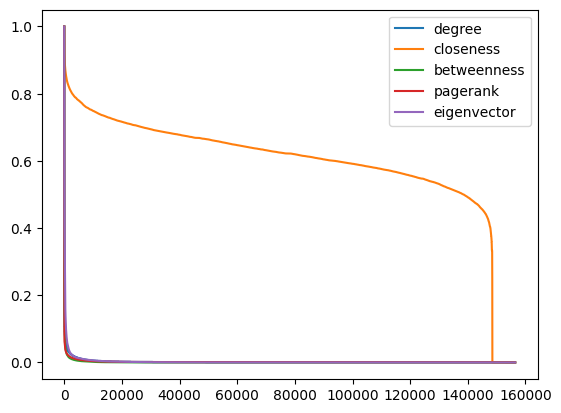

In [7]:
# shows distribution of all node metrics in single histogram

import matplotlib.pyplot as plt
#import numpy as np

centralities_lists = [metric[measure].to_numpy()/max(metric[measure]) for measure, metric in centralities_rankings.items()]
labels = [measure for measure in centralities_rankings.keys()]

#plt.figure(figsize=(8, 6))
for l in centralities_lists:
    plt.plot(l)
plt.legend(labels)

In [8]:
# see how artists rank in the metrics

nodes_subdf = nodes_df[["name"]]
#print(nodes_subdf)

for measure, ranking in centralities_rankings.items():
    nodes_subdf = nodes_subdf.join(ranking[measure], lsuffix="_metrics", rsuffix="_dataset")
    nodes_subdf[measure] = nodes_subdf[measure].rank(method="first", ascending=False).sub(1).astype(int)+1

print(centralities_names)
nodes_subdf["avg_rank"] = nodes_subdf[centralities_names].mean(axis=1)

nodes_subdf = nodes_subdf.sort_values("avg_rank")
print(nodes_subdf)
#print(list(nodes_subdf["name"]))

['degree', 'closeness', 'betweenness', 'pagerank', 'eigenvector']
                                                           name  degree   
node                                                                      
7hJcb9fa4alzcOq3EaNPoG                               Snoop Dogg       9  \
13y7CgLHjMVRMDqxdx0Xdo                               Gucci Mane       7   
1Cs0zKBU1kc0i8ypK3B9ai                             David Guetta      14   
77AiFEVeAVj2ORpC85QVJs                               Steve Aoki       8   
5fMUXHkw8R8eOP2RNVYEZX                                    Diplo      10   
...                                                         ...     ...   
7yyMOelJOwDbRoBSGMj2x3                                   Kokipo  156632   
7zUEJRavunKtqi2n029IHn                     Mohamed El Sharnouby  156633   
7zbcwixMeXkXFrKXM6CbDd  Maija Salon musiikkileikkikoulun lapset  156634   
7zdfnAJZnKAaL27zyxCdGl                            Bolat Nurimov  156635   
7zvixFTda9W49rPuaK3pKL            

                        clustering_coeffs         name
node                                                  
6vCU4ORbNFUSNXe7mnsbWX                1.0     Nikolija
52SfCmmw2BTxDSwVqEnYZJ                1.0     El Panda
52MWHSohXVqTyGhBPRJepS                1.0       KIHYUN
52NF96REyS7uomwEmZkmC5                1.0        ESTEE
6UYfgBIUyBOv1MdLz6MvMi                1.0        Wefyr
...                                   ...          ...
2r4agJg5M8a7lNJLIiLBNN                0.0  Paktofonika
2r4Kc1gIZqwTZIHDeZ5Io6                0.0   Cartel Mcs
2r3wU1ei8dN7KQQQ9fjkKj                0.0        EFETE
2r2gVKnWWvmrvFeCT8dNle                0.0        Bartz
7zzvUdZZP6wcZ1gD3SpmDl                0.0      Francis

[156428 rows x 2 columns]
Nikolija


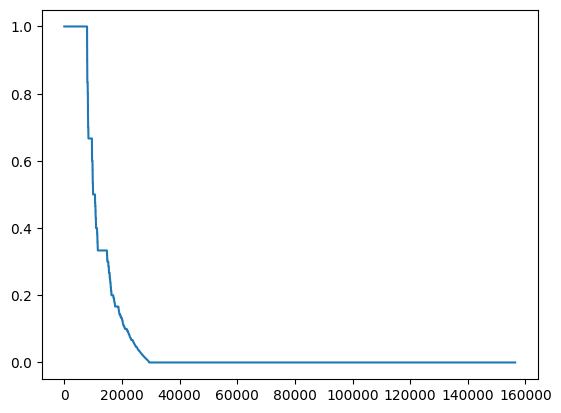

In [28]:
df = pd.read_csv("../results/real_node_metrics_clustering_coeffs.csv", sep=';', index_col=0)
df = df.join(nodes_df["name"], lsuffix="_metrics", rsuffix="_dataset")
df = df.sort_values("clustering_coeffs", ascending=False)
print(df)
#print(df.loc["6vCU4ORbNFUSNXe7mnsbWX"]["name"])

plt.plot(df["clustering_coeffs"].to_numpy())

In [20]:
G = create_graphs.create_graph_nx()